In [84]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/clusters.csv')
df2 = df.copy()

In [85]:
clusters = set(df['cluster'])

In [86]:
documents = set(df2['image'])

In [87]:
len(documents)

85

Si nous voulons pour une image donnée, connaître le nombre d'occurence de fois qu'un de ses descripteurs appartient à un cluster donné, nous pouvons faire un groupby selon l'image et le cluster et compter le nombre d'occurence. 

In [88]:
allhist = df2.groupby(['image','cluster']).size().to_frame('count').reset_index()

In [89]:
def showHist(filename):
    width = 1/1.5
    hist = allhist.loc[allhist['image'] == filename][['cluster', 'count']]
    plt.xlabel('clusters')
    plt.ylabel('occurences')
    plt.title("histogramme de l'image " + filename)
    plt.bar(hist['cluster'], hist['count'], width, color="blue")

Par exemple ici nous affichons l'histogramme de l'image 130001.jpg

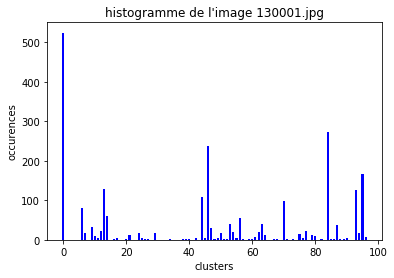

In [90]:
showHist('130001.jpg')

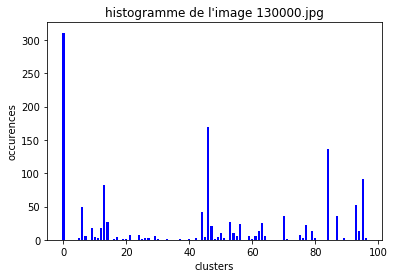

In [147]:
showHist('130000.jpg')

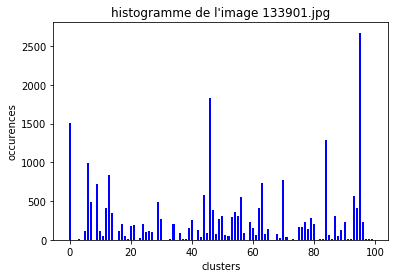

In [154]:
showHist('133901.jpg')



In [91]:
allhist.loc[allhist['image'] == '130001.jpg'][['cluster', 'count']].head()

,cluster,count
57,0,524
58,6,81
59,7,17
60,9,32
61,10,10


### Document Frequency

Nous considérons que le document corresponds à l'image et le terme au cluster. 
Nous voulons pour chaque terme le nombre de documents qui utilisent ce terme divisé par le nombre de documents total 

In [92]:
df2 = df2.groupby('cluster').image.nunique().to_frame('count').reset_index()
df2['count'] = df2['count']/(len(documents))

### Inverse Document Frequency

A partir de cela nous obtenons IDF c'est simplement le logarithme de l'inverse de df, ainsi si df = 1 nous avons idf avec un point de 0, c'est une manière de dire qu'un df très faible devrait avoir plus de poids

In [93]:
import numpy as np

df2['count'] = np.log(1/df2['count'])

In [94]:
df2.head()

,cluster,count
0,0,0.011834
1,1,1.398129
2,2,1.008664
3,3,1.110447
4,4,1.398129


In [95]:
df2.shape

(100, 2)

### Term Frequency

le term frequency est le frequence d'apparition d'un terme dans l'ensemble des mots du documents

On prends simplement les histogrammes que nous divisons par le nombre de mots dans le document

In [96]:
allhist.loc[allhist['image'] == '130001.jpg'][['cluster', 'count']].head()

,cluster,count
57,0,524
58,6,81
59,7,17
60,9,32
61,10,10


In [97]:
allword = allhist.groupby('image')['count'].sum().to_frame('allword').reset_index()
allword_dict = dict(zip(allword.image, allword.allword))


In [98]:
allhist['allword'] = allhist.apply(lambda x: allword_dict[x['image']], axis=1)

In [99]:
allhist['tf'] = allhist['count']/allhist['allword']
allhist.drop(['allword'], axis = 1, inplace = True, errors = 'ignore')


In [100]:
allhist.head()

,image,cluster,count,tf
0,130000.jpg,0,311,0.231055
1,130000.jpg,5,2,0.001486
2,130000.jpg,6,49,0.036404
3,130000.jpg,7,6,0.004458
4,130000.jpg,9,17,0.012630


### tf-idf

Ensuite il suffit de multiplier le tf obtenue par l'idf correspondant. 

In [101]:
idf_dict = df2.set_index('cluster').T.to_dict('records')[0]

In [102]:
allhist['tfidf'] = allhist.apply(lambda x: x['tf']*idf_dict[x['cluster']], axis=1)

In [103]:
allhist.head()

,image,cluster,count,tf,tfidf
0,130000.jpg,0,311,0.231055,0.002734
1,130000.jpg,5,2,0.001486,0.000332
2,130000.jpg,6,49,0.036404,0.001755
3,130000.jpg,7,6,0.004458,0.000326
4,130000.jpg,9,17,0.012630,0.001750


In [114]:
finalmatrix = allhist.pivot(index='image', columns='cluster', values='tfidf')
finalmatrix = finalmatrix.fillna(0)

In [155]:
finalmatrix

cluster,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
image,,,,,,,,,,,,,,,,,,,,,
130000.jpg,0.002734,0.000000,0.000000,0.000000,0.000000,0.000332,0.001755,0.000326,0.000000,0.001750,...,0.000000,0.000000,0.000000,0.001388,0.000707,0.001610,0.000564,0.000000,0.000000,0.000000
130001.jpg,0.002620,0.000000,0.000000,0.000000,0.000000,0.000000,0.001650,0.000526,0.000000,0.001874,...,0.000567,0.000000,0.000000,0.001913,0.000526,0.001670,0.000855,0.000000,0.000000,0.000000
130100.jpg,0.001719,0.000000,0.000000,0.000000,0.000000,0.000000,0.002693,0.000000,0.000000,0.002323,...,0.001499,0.000000,0.000000,0.006424,0.002045,0.000798,0.000000,0.000000,0.000000,0.000000
130101.jpg,0.002124,0.000000,0.000000,0.000000,0.000000,0.000000,0.001545,0.001095,0.000000,0.001481,...,0.000000,0.000000,0.000000,0.002303,0.000469,0.003358,0.000541,0.000000,0.000000,0.000000
130102.jpg,0.000141,0.000000,0.000000,0.000000,0.000000,0.000884,0.002100,0.000290,0.000000,0.003568,...,0.002656,0.000000,0.000000,0.002063,0.003334,0.002263,0.000000,0.000000,0.002504,0.000000
130200.jpg,0.000326,0.000820,0.000592,0.000000,0.000000,0.000720,0.001697,0.002212,0.000000,0.001505,...,0.001968,0.000000,0.000485,0.001455,0.001504,0.002348,0.000000,0.000000,0.000371,0.000000
130201.jpg,0.000281,0.000000,0.000303,0.000000,0.000000,0.001006,0.001739,0.002046,0.000000,0.001291,...,0.003306,0.000000,0.000166,0.001674,0.001496,0.002247,0.000076,0.000813,0.000380,0.000000
130300.jpg,0.000267,0.000000,0.000000,0.000000,0.000000,0.000635,0.002561,0.001004,0.000000,0.002462,...,0.003448,0.000000,0.000190,0.001760,0.002084,0.001705,0.000044,0.000000,0.000000,0.000227
130301.jpg,0.000281,0.000000,0.000090,0.000000,0.000000,0.000659,0.002109,0.001415,0.000000,0.001650,...,0.002833,0.000000,0.000197,0.001698,0.001965,0.001952,0.000023,0.000121,0.000000,0.000059


### inverted index

L'index inversé corresponds à la liste des documents qui contiennent le mot 
On l'obtient en faisant un groupby sur la colonne cluster et en récupérant pour chaque cluster la liste des noms unique que nous trouvons 

In [104]:
invertedIndex = df.groupby('cluster')['image'].unique().to_frame('documents').reset_index()
invertedIndex.shape

In [105]:
def ff(x):
    print(x)
    return int(invertedIndex.documents.count(x))
for genre in documents:
    invertedIndex[genre] = invertedIndex.apply(lambda _: int(genre in _.documents), axis=1)
    
invertedIndex.drop(['documents'], axis = 1, inplace = True, errors = 'ignore')

invertedIndex = invertedIndex.set_index('cluster')

In [128]:
invertedIndex

,138504.jpg,138301.jpg,138105.jpg,133901.jpg,133601.jpg,138707.jpg,138100.jpg,131000.jpg,138300.jpg,138308.jpg,...,138703.jpg,138503.jpg,138201.jpg,138700.jpg,131401.jpg,138202.jpg,138305.jpg,130000.jpg,138303.jpg,131102.jpg
cluster,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,1,1,0,1,0,1,0,1,1,1,...,0,0,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Retrouvé 

Nous avons la matrice des tfidf, ce que nous voulons c'est trouver maintenant les images qui ressemblent le plus à une image en entrée, prenant celle de nom 130301.jpg. 
Tout d'abord on peut calculer la distance entre chaque image sachant le tfidf, ici je n'ai pas normalisé car je pense que cela est implicite vu qu'on divise par le nombre de document. 
Nous obtenons la distance de chaque image entre elles 

In [178]:
image = '130301.jpg'

In [183]:
import scipy

ary = scipy.spatial.distance.cdist(finalmatrix, finalmatrix, metric='euclidean')
result = pd.DataFrame(ary, index=finalmatrix.index.tolist(), columns=finalmatrix.index.tolist()) 

Nous obtenons la distance de chaque image entre elles 

In [184]:
result

,130000.jpg,130001.jpg,130100.jpg,130101.jpg,130102.jpg,130200.jpg,130201.jpg,130300.jpg,130301.jpg,130302.jpg,...,138605.jpg,138700.jpg,138701.jpg,138702.jpg,138703.jpg,138704.jpg,138705.jpg,138706.jpg,138707.jpg,138708.jpg
130000.jpg,0.000000,0.003349,0.012276,0.009908,0.017999,0.013672,0.013878,0.015241,0.014167,0.012188,...,0.015993,0.012692,0.012771,0.034517,0.023494,0.008828,0.007937,0.011622,0.011040,0.017344
130001.jpg,0.003349,0.000000,0.012380,0.011020,0.018388,0.014515,0.014622,0.015801,0.014887,0.012632,...,0.016298,0.012036,0.012262,0.033410,0.024037,0.009674,0.008044,0.012359,0.010332,0.017932
130100.jpg,0.012276,0.012380,0.000000,0.011781,0.016041,0.013821,0.013295,0.014028,0.012979,0.014263,...,0.017963,0.019191,0.018778,0.039396,0.022780,0.014942,0.014081,0.012563,0.017467,0.018197
130101.jpg,0.009908,0.011020,0.011781,0.000000,0.015734,0.010699,0.010763,0.012528,0.011055,0.012013,...,0.014837,0.018801,0.019110,0.041426,0.022744,0.013119,0.010664,0.008545,0.017278,0.015330
130102.jpg,0.017999,0.018388,0.016041,0.015734,0.000000,0.011562,0.011375,0.008495,0.009828,0.018676,...,0.018511,0.024256,0.023358,0.044209,0.021634,0.018923,0.014750,0.014164,0.022251,0.021141
130200.jpg,0.013672,0.014515,0.013821,0.010699,0.011562,0.000000,0.004008,0.006561,0.005393,0.013738,...,0.015889,0.020954,0.019770,0.042208,0.020563,0.013752,0.012173,0.008461,0.018750,0.017613
130201.jpg,0.013878,0.014622,0.013295,0.010763,0.011375,0.004008,0.000000,0.006399,0.004770,0.013832,...,0.015864,0.021103,0.020035,0.042388,0.020768,0.014015,0.012384,0.008509,0.018903,0.017720
130300.jpg,0.015241,0.015801,0.014028,0.012528,0.008495,0.006561,0.006399,0.000000,0.004223,0.015828,...,0.016715,0.022125,0.020949,0.042725,0.019956,0.015829,0.012997,0.010795,0.019946,0.019357
130301.jpg,0.014167,0.014887,0.012979,0.011055,0.009828,0.005393,0.004770,0.004223,0.000000,0.014213,...,0.015904,0.021142,0.019978,0.042180,0.019707,0.014054,0.012790,0.008859,0.018967,0.017909
130302.jpg,0.012188,0.012632,0.014263,0.012013,0.018676,0.013738,0.013832,0.015828,0.014213,0.000000,...,0.010862,0.015205,0.016503,0.037978,0.024194,0.013158,0.013796,0.008822,0.015411,0.011647


In [185]:
result = dict(zip(result.index.tolist(), result[image]))
for r in sorted(result, key=result.get, reverse=False):
    print((r, result[r]))



('130301.jpg', 0.0)
('138001.jpg', 0.002884456249463048)
('130300.jpg', 0.004223307683618691)
('133701.jpg', 0.004727698547102874)
('130201.jpg', 0.004769614886499777)
('138201.jpg', 0.00482374561020201)
('130200.jpg', 0.00539323102270914)
('138301.jpg', 0.005480469649195871)
('138200.jpg', 0.005523276424804286)
('138304.jpg', 0.005680668325408084)
('138302.jpg', 0.005925021916485277)
('131000.jpg', 0.005943985327404365)
('133703.jpg', 0.006074917868844047)
('138300.jpg', 0.006222426418652239)
('138002.jpg', 0.006587150691718446)
('131001.jpg', 0.00666799137105889)
('138305.jpg', 0.00766921892726621)
('138303.jpg', 0.008208736782734472)
('131100.jpg', 0.008746303574528406)
('138706.jpg', 0.008858713891020694)
('133700.jpg', 0.00889584964332163)
('133900.jpg', 0.00937512864023666)
('133901.jpg', 0.009547795933487509)
('138203.jpg', 0.009649352868037657)
('138401.jpg', 0.009719321701681856)
('130102.jpg', 0.009827679599557665)
('138003.jpg', 0.009883777387714362)
('131401.jpg', 0.0099778

On voit que pour notre image 130301.jpg nous obtenons comme deuxième meilleure résultat 130300.jpg, ce qui est une bonne réponse, mais le meilleure résultat est inccorrect. 
Peut-être qu'il s'agit des paramètres de surf qui ne nous donne pas assez de descripteurs